In [192]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import numpy as np
from math import pi
from qutip import *

In [193]:
w_q1 = 2*pi*6.85;     # Qubit 1 frequency
w_q2 = 2*pi*6.0;    # Qubit 2 frequency: generally in the range from 1-9 GHz
w_f1 = 2*pi*7.1     # Resonator/ Filter frequency
w_f2 = 2*pi*7.24
w_f3 = 2*pi*7.37
g_f = 2*pi*1.818     # Filter-filter coupling
g_f2 = 2*pi*3890000

numF = 3             # number of filters
N = 2                # number of fock states (??)

tlist = np.linspace(0, 25, 101)

In [194]:
def Hqubit(sz, w_q):
  """ 
  Comuptes the qubit hamiltonian
  @param sz :: Pauli's z matrix
  @param w_q :: qubit frequency
  """
  return 0.5*sz*w_q

def numOp(m):
  """
  Computes the number operator 
  @param loweringMat :: lowering matrix operator for a system
  """
  return m.dag()*m

def antiCommut(a2, a1):
  """
  Computes product of a2.dag()*a1, then sums this to (a2.dag()*a1).dag()
  @param a1 :: destruction operator 1
  @param a2 :: destruction operator 2
  """
  return a2.dag()*a1 + a1.dag()*a2

In [195]:
# cavity 1, 2, 3 destruction operators
a1 = tensor(destroy(N), qeye(N), qeye(N))
a2 = tensor(qeye(N), destroy(N), qeye(N))
a3 = tensor(qeye(N), destroy(N), qeye(N))

# Filter Hamiltonians (refer formula in the Introduction)
H_f1 = tensor(destroy(N),create(N),qeye(N)) + tensor(create(N),destroy(N),qeye(N))
H_f2 = tensor(qeye(N),create(N),destroy(N)) + tensor(qeye(N),destroy(N),create(N))
Hf = w_f1*(numOp(a1) + numOp(a2) + numOp(a3))+ g_f*(H_f1+H_f2)  

In [196]:
def compute(w_qList, Hf, N):
  """
  Computes the Eigen-vales and states for a given qubit frequency
  @param w_qList :: range of qubit frequencies
  @param H_q1 :: Qubit 1 independent Hamiltonian 
  @param N :: Number of Fock states
  @param sz1 :: z matrix for qubit 1
  """
  evals_mat = np.zeros((len(w_qList), 8))
  for i, w_qi in enumerate(w_qList):
    H = Hf 
    evals, evecs = H.eigenstates()
    print(H.eigenenergies())
    evals_mat[i,:] = evals
  return evals_mat

In [197]:
H = Hf 
print(H.eigenenergies())
Hf

[ -1.48484174   0.          40.53221239  42.01705413  91.81479291
  93.29963465 133.83184704 135.31668879]


Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[  0.           0.           0.           0.           0.
    0.           0.           0.        ]
 [  0.           0.          11.42283089   0.           0.
    0.           0.           0.        ]
 [  0.          11.42283089  89.22123136   0.          11.42283089
    0.           0.           0.        ]
 [  0.           0.           0.          89.22123136   0.
   11.42283089   0.           0.        ]
 [  0.           0.          11.42283089   0.          44.61061568
    0.           0.           0.        ]
 [  0.           0.           0.          11.42283089   0.
   44.61061568  11.42283089   0.        ]
 [  0.           0.           0.           0.           0.
   11.42283089 133.83184704   0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.         133.83184704]]

In [198]:
# range of qubit 1 frequencies
w_q1List = np.linspace(0.1,7.2,100)*2*pi

evals_mat = compute(w_q1List, Hf, N)

y1 = evals_mat[:, 1] - evals_mat[:, 0]


[ -1.48484174   0.          40.53221239  42.01705413  91.81479291
  93.29963465 133.83184704 135.31668879]
[ -1.48484174   0.          40.53221239  42.01705413  91.81479291
  93.29963465 133.83184704 135.31668879]
[ -1.48484174   0.          40.53221239  42.01705413  91.81479291
  93.29963465 133.83184704 135.31668879]
[ -1.48484174   0.          40.53221239  42.01705413  91.81479291
  93.29963465 133.83184704 135.31668879]
[ -1.48484174   0.          40.53221239  42.01705413  91.81479291
  93.29963465 133.83184704 135.31668879]
[ -1.48484174   0.          40.53221239  42.01705413  91.81479291
  93.29963465 133.83184704 135.31668879]
[ -1.48484174   0.          40.53221239  42.01705413  91.81479291
  93.29963465 133.83184704 135.31668879]
[ -1.48484174   0.          40.53221239  42.01705413  91.81479291
  93.29963465 133.83184704 135.31668879]
[ -1.48484174   0.          40.53221239  42.01705413  91.81479291
  93.29963465 133.83184704 135.31668879]
[ -1.48484174   0.          40.532212

Text(0.5, 1.0, 'Energy Spectrum for 3 cavities')

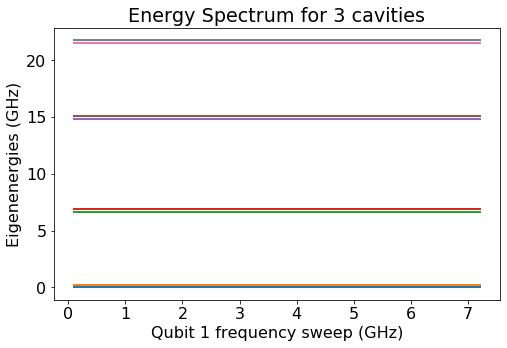

In [199]:
fig,ax = plt.subplots(figsize=(8,5))

for n in range(0,8):
  ax.plot(w_q1List / (2 * pi), (evals_mat[:, n] - evals_mat[:, 0])/ (2 * pi), lw=2)
ax.set_xlabel('Qubit 1 frequency sweep (GHz)')
#ax.set_ylim([6.99,7.001])
ax.set_ylabel('Eigenenergies (GHz)')
ax.set_title('Energy Spectrum for 3 cavities')